<a href="https://colab.research.google.com/github/allen44/springboard_unit_4_challenge/blob/main/Unit_4_Challenge_Tier_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objective Question:
 ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

### 1. Sourcing and Loading 


#### 1.1. Importing Libraries

In [ ]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt



#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [ ]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 

**2.1. Exploring your data** 

Let's take a look at the data frame iand see what stands out.

In [ ]:
properties.head()


,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Unnamed: 34,Inner London,Outer London,Unnamed: 37,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,E09000011,E09000012,E09000013,E09000014,E09000015,E09000016,E09000017,E09000018,E09000019,E09000020,E09000021,E09000022,E09000023,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033,NaN,E13000001,E13000002,NaN,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,62300.1,61296.5,124903,76287.6,84769.5,68000.1,73834.8,72231.7,92516.5,182695,80875.8,67771,60491.3,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025,NaN,78252,72958.8,NaN,42076.4,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,60993.3,63187.1,122088,78901.2,83396.1,69393.5,75031.1,71051.6,94342.4,182345,81230.1,65381.5,60869.3,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468,NaN,75885.7,72937.9,NaN,42572,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,61377.8,63593.3,120636,78521.9,83416.2,69368,74188.7,72098,93465.9,182879,81111.5,66336.5,60288,80661.7,53458.3,72501.4,107325,65763.3,70306.8,63938.7,60871.1,87124.8,132260,NaN,76591.6,72714.5,NaN,42369.7,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,61927.7,65139.6,121425,79545.6,83567.9,69444.3,73911.4,71890.3,93344.5,184177,81672.8,66388.8,59471,79990.5,54479.8,72228.6,106875,63073.6,69411.9,66233.2,60971.4,87026,133370,NaN,76851.6,72591.9,NaN,42095.8,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [ ]:
properties.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            308 non-null    datetime64[ns]
 1   City of London        309 non-null    object        
 2   Barking & Dagenham    309 non-null    object        
 3   Barnet                309 non-null    object        
 4   Bexley                309 non-null    object        
 5   Brent                 309 non-null    object        
 6   Bromley               309 non-null    object        
 7   Camden                309 non-null    object        
 8   Croydon               309 non-null    object        
 9   Ealing                309 non-null    object        
 10  Enfield               309 non-null    object        
 11  Greenwich             309 non-null    object        
 12  Hackney               309 non-null    object        
 13  Hammersmith & Fulham

In [ ]:
properties.describe()

,Unnamed: 34,Unnamed: 37,Unnamed: 47
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


**2.2. Cleaning the data**


#### Set the index
Using chained method calls, we will:
1. Rename the column 0 to 'Date',
2. Set 'Date' to be the new index,
3. Sort the new index

In [ ]:
properties_2 = properties.rename(columns={properties.columns[0] : 'Date'}).set_index('Date', drop=True).sort_index()
properties_2.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Unnamed: 34,Inner London,Outer London,Unnamed: 37,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,62300.1,61296.5,124903,76287.6,84769.5,68000.1,73834.8,72231.7,92516.5,182695,80875.8,67771,60491.3,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025,NaN,78252,72958.8,NaN,42076.4,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,60993.3,63187.1,122088,78901.2,83396.1,69393.5,75031.1,71051.6,94342.4,182345,81230.1,65381.5,60869.3,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468,NaN,75885.7,72937.9,NaN,42572,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,61377.8,63593.3,120636,78521.9,83416.2,69368,74188.7,72098,93465.9,182879,81111.5,66336.5,60288,80661.7,53458.3,72501.4,107325,65763.3,70306.8,63938.7,60871.1,87124.8,132260,NaN,76591.6,72714.5,NaN,42369.7,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,61927.7,65139.6,121425,79545.6,83567.9,69444.3,73911.4,71890.3,93344.5,184177,81672.8,66388.8,59471,79990.5,54479.8,72228.6,106875,63073.6,69411.9,66233.2,60971.4,87026,133370,NaN,76851.6,72591.9,NaN,42095.8,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9
1995-05-01,84409.1,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,70630.8,63513,66194,124434,79374,83853.7,68534.5,73117.1,72877.5,94346.4,191474,82123.5,69035.1,58551.4,80874,55804,72366.6,107708,64420.5,69759.2,66432.9,61494.2,86518.1,133911,NaN,79129.2,72753,NaN,43266.5,44223.6,44831,45878,50369.7,56479.8,75432,64530.4,54698.8,NaN,53678.2


We see that the index was set correctly.

In [ ]:
properties_2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 1995-01-01 to NaT
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City of London        309 non-null    object 
 1   Barking & Dagenham    309 non-null    object 
 2   Barnet                309 non-null    object 
 3   Bexley                309 non-null    object 
 4   Brent                 309 non-null    object 
 5   Bromley               309 non-null    object 
 6   Camden                309 non-null    object 
 7   Croydon               309 non-null    object 
 8   Ealing                309 non-null    object 
 9   Enfield               309 non-null    object 
 10  Greenwich             309 non-null    object 
 11  Hackney               309 non-null    object 
 12  Hammersmith & Fulham  309 non-null    object 
 13  Haringey              309 non-null    object 
 14  Harrow                309 non-null    object 
 15  Havering   

We can see that there is one NaT value in the index. We will fix that soon.

In [ ]:
properties_2.tail()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Unnamed: 34,Inner London,Outer London,Unnamed: 37,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-01,899831,295744,532503,339408,466574,420036,862209,369791,490596,408018,402463,572410,688761,563752,449553,367809,422073,416681,652895,1.42852e+06,480619,523127,423031,513216,376579,423193,664536,525473,376155,498228,443510,615207,937356,NaN,592328,427978,NaN,134545,168261,170198,197505,203658,290621,479018,324659,261006,NaN,251973
2020-06-01,938833,300595,519064,341611,487237,429366,854786,367831,470321,386424,392153,567038,683448,546323,442963,371732,407123,402961,664583,1.28551e+06,478690,521961,428544,518232,373756,414774,697714,511747,371705,443876,448840,588519,966149,NaN,577543,425376,NaN,130224,169717,168830,199857,203749,293593,482227,324398,261222,NaN,252432
2020-07-01,852151,304223,524400,344964,481094,434112,804558,374825,475064,388447,392400,581531,730953,545067,452337,375771,413418,400153,675698,1.31339e+06,487560,538465,427380,525327,376484,417324,696244,513467,373751,444863,446863,597417,916843,NaN,581344,428906,NaN,131709,171298,169835,201191,204730,294161,485010,327057,264824,NaN,254310
2020-08-01,814665,302395,522846,350938,487949,435535,812080,376180,487322,395854,394809,564159,731718,572535,460179,371104,413445,407440,736991,1.36832e+06,496801,546470,417152,524429,373196,426675,713067,503092,383367,461692,451537,616711,963725,NaN,590399,432947,NaN,131701,173617,170025,202345,204886,296411,489159,332147,264886,NaN,256109
NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,E09000011,E09000012,E09000013,E09000014,E09000015,E09000016,E09000017,E09000018,E09000019,E09000020,E09000021,E09000022,E09000023,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033,NaN,E13000001,E13000002,NaN,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001


Here, we can see that the NaT index corresponds to a row of non-numeric entries.

###Slicing  `properties_2` to yield a dataframe without irrelevant columns 

####Column 0:
This column contains data for the City of London, which is not one of the 32 London boroughs.

####Column 33, 36, 46: 
These are spacer columns that contain no data. They are only helpful to visually seperate the different class of columns in an excel sheet, but are not helpful in a DataFrame.

####Column 34-35, 37-45, 47:
These are aggregations of the burough in the 33 buroughs so they aren't helpful as we already have more granular data available by using the data from each burough.

####Row 309 (bottom row):
The 309th row contains some kind of encoded info that won't be useful for this analysis.


In [ ]:
temp = properties_2.iloc[:-1, 1:33]
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 1995-01-01 to 2020-08-01
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Barking & Dagenham    308 non-null    object
 1   Barnet                308 non-null    object
 2   Bexley                308 non-null    object
 3   Brent                 308 non-null    object
 4   Bromley               308 non-null    object
 5   Camden                308 non-null    object
 6   Croydon               308 non-null    object
 7   Ealing                308 non-null    object
 8   Enfield               308 non-null    object
 9   Greenwich             308 non-null    object
 10  Hackney               308 non-null    object
 11  Hammersmith & Fulham  308 non-null    object
 12  Haringey              308 non-null    object
 13  Harrow                308 non-null    object
 14  Havering              308 non-null    object
 15  Hillingdon           

As expected, we see that our slice contains only the 33 boroughs of interest in the 33 columns (down from 49 columns). Also, now there is only 308 monthly observations in 308 rows (down from 309 rows).

Let's reasssign `properties` to this slice.


In [ ]:
properties_3 = temp
properties_3.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-01,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,62300.1,61296.5,124903,76287.6,84769.5,68000.1,73834.8,72231.7,92516.5,182695,80875.8,67771,60491.3,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025
1995-02-01,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,60993.3,63187.1,122088,78901.2,83396.1,69393.5,75031.1,71051.6,94342.4,182345,81230.1,65381.5,60869.3,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468
1995-03-01,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,61377.8,63593.3,120636,78521.9,83416.2,69368,74188.7,72098,93465.9,182879,81111.5,66336.5,60288,80661.7,53458.3,72501.4,107325,65763.3,70306.8,63938.7,60871.1,87124.8,132260
1995-04-01,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,61927.7,65139.6,121425,79545.6,83567.9,69444.3,73911.4,71890.3,93344.5,184177,81672.8,66388.8,59471,79990.5,54479.8,72228.6,106875,63073.6,69411.9,66233.2,60971.4,87026,133370
1995-05-01,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,82077.1,70630.8,63513,66194,124434,79374,83853.7,68534.5,73117.1,72877.5,94346.4,191474,82123.5,69035.1,58551.4,80874,55804,72366.6,107708,64420.5,69759.2,66432.9,61494.2,86518.1,133911


**2.4.Transforming the data**

After slicing only the relevant data earlier, we can proceed without melting the dataframe.

Recast the object data types as floating points, becuase prices should be floating points.

In [ ]:
properties_4 = properties_3.astype(float)
properties_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 1995-01-01 to 2020-08-01
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barking & Dagenham    308 non-null    float64
 1   Barnet                308 non-null    float64
 2   Bexley                308 non-null    float64
 3   Brent                 308 non-null    float64
 4   Bromley               308 non-null    float64
 5   Camden                308 non-null    float64
 6   Croydon               308 non-null    float64
 7   Ealing                308 non-null    float64
 8   Enfield               308 non-null    float64
 9   Greenwich             308 non-null    float64
 10  Hackney               308 non-null    float64
 11  Hammersmith & Fulham  308 non-null    float64
 12  Haringey              308 non-null    float64
 13  Harrow                308 non-null    float64
 14  Havering              308 non-null    float64
 15  Hill

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [ ]:
properties_4.count()

Barking & Dagenham      308
Barnet                  308
Bexley                  308
Brent                   308
Bromley                 308
Camden                  308
Croydon                 308
Ealing                  308
Enfield                 308
Greenwich               308
Hackney                 308
Hammersmith & Fulham    308
Haringey                308
Harrow                  308
Havering                308
Hillingdon              308
Hounslow                308
Islington               308
Kensington & Chelsea    308
Kingston upon Thames    308
Lambeth                 308
Lewisham                308
Merton                  308
Newham                  308
Redbridge               308
Richmond upon Thames    308
Southwark               308
Sutton                  308
Tower Hamlets           308
Waltham Forest          308
Wandsworth              308
Westminster             308
dtype: int64

We find that we have exactly 308 entries in each column, as expected.

**2.6. Visualizing the data**

Let's plot a line chart to get an idea of what this data looks like.

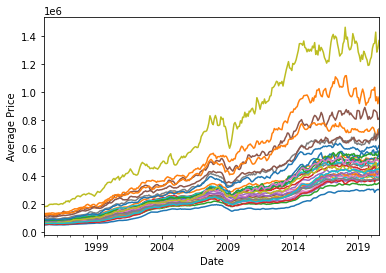

In [ ]:
properties_4.plot(legend=False)
plt.ylabel('Average Price')
plt.show()

We can intuitivly see that all the boroughs have higher prices now than 20 years ago. We expect that any computations or engineering of the data will match this intuition.

####Downsampling the data
Let's down-sample the data to annual frequency, to reduce the number of data points, as the primary question here can be answered with much less granular data than provided.

In [ ]:
properties_5 = properties_4.resample('A').last()
properties_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 1995-12-31 to 2020-12-31
Freq: A-DEC
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barking & Dagenham    26 non-null     float64
 1   Barnet                26 non-null     float64
 2   Bexley                26 non-null     float64
 3   Brent                 26 non-null     float64
 4   Bromley               26 non-null     float64
 5   Camden                26 non-null     float64
 6   Croydon               26 non-null     float64
 7   Ealing                26 non-null     float64
 8   Enfield               26 non-null     float64
 9   Greenwich             26 non-null     float64
 10  Hackney               26 non-null     float64
 11  Hammersmith & Fulham  26 non-null     float64
 12  Haringey              26 non-null     float64
 13  Harrow                26 non-null     float64
 14  Havering              26 non-null     float6

We see that there are now only 26 dates which span 1995 to 2020.

Let's reindex the dataframe, as annual data need not specifiy the month and day in the index.

In [ ]:
properties_5['Year'] = properties_5.index.year
properties_6 = properties_5.set_index('Year', drop=True)
properties_6.tail()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,285621.8776,522223.27300,331024.54500,490417.69110,429187.30860,832125.72010,363571.31490,485390.22710,394465.01190,374293.24140,548758.42400,736962.69610,535097.04680,464037.26260,350729.64420,411479.40340,391460.22010,647853.42660,1.357231e+06,490877.92190,512057.81690,398752.06360,486293.11790,353282.0853,402169.34050,637708.02950,509842.95310,369868.68890,460400.4395,433856.57580,615143.78710,1.029585e+06
2017,292914.7086,538717.70980,340598.38030,494515.16380,445503.79240,844415.68710,374440.85290,469145.69150,395284.08730,385851.24420,557024.88930,742878.31860,549659.81810,474005.22140,365934.16990,409262.74250,404048.39970,639370.68360,1.364185e+06,485524.97010,509180.46820,408684.31890,517135.18750,349429.4686,416711.50480,650160.12840,485749.34330,377963.40460,465624.8325,441467.86000,596878.79950,1.096072e+06
2018,301113.5452,533810.05363,343667.46694,476355.64756,443139.79724,867795.25411,364188.83485,481921.87844,397673.58684,385910.65807,548134.89353,733359.68488,544836.45441,462277.55163,372294.50642,410922.43945,401032.52171,625190.02458,1.345805e+06,486401.33126,510921.82735,410420.51832,517612.81291,354253.3329,426822.70814,645744.94357,501604.46154,375473.92183,438896.3523,439078.67321,595503.76753,9.650226e+05
2019,301283.4446,519306.24500,336301.87200,427126.34980,438681.81100,807124.18680,369567.88320,469662.03380,400182.39260,398024.37860,552784.86070,728698.05720,565582.06100,446899.54230,365885.57080,404843.16640,409569.34060,648968.88950,1.231765e+06,487696.11820,521705.20550,413462.24000,500651.11590,360934.0315,424631.04490,655377.84960,505499.14310,372581.42880,456436.0060,437333.41620,605559.86850,9.609431e+05
2020,302394.8958,522845.51010,350938.35200,487949.40030,435534.69630,812079.59230,376180.38910,487321.64780,395854.18640,394809.17310,564158.63380,731717.82590,572534.74260,460178.99310,371103.92820,413444.99490,407440.41300,736991.41240,1.368318e+06,496801.46870,546469.82290,417152.33080,524429.17950,373195.7560,426674.63880,713067.28710,503092.15420,383366.67470,461691.6301,451536.74410,616711.02000,9.637252e+05


**3. Modeling**



To answer the question , "which boroughs of London have seen the greatest house price increase, on average, over the past two decades?", we need to calulcate the percent change with an offset of 20 annual periods (2 decades) and multiply by 100.

In [ ]:
properties_7 = properties_6.pct_change(20).multiply(100)
properties_7

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there's a lot of NaN values becuase these rows did not have 20 years of offset data for the calculation.

Let's plot this to see what it looks like.

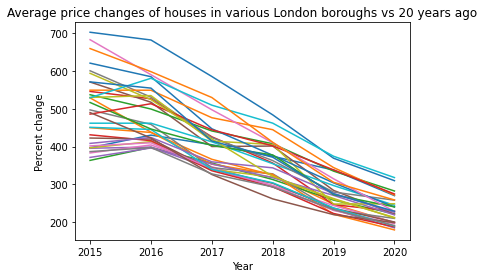

In [ ]:
properties_7.plot(legend=False)
plt.title('Average price changes of houses in various London boroughs vs 20 years ago')
plt.ylabel('Percent change')
plt.show()

At a glance, we can see that all London boroughs are between 180% and 350% higher than prices 20 years ago.

####Ranking the top 5 
Use .nlargest() method to show the top 5 boroughs with the largest average price increase in 2 decades. As this method finds the n-largest of a column, we'll have to transpose the dataframe first. Also, as there are lots of NaN values ifn the DataFrame, we'll slice to exclude the months that don't have two decades of lookback data.

Using chained method calls, we will:
1. slice to exclude the NaN value,
2. Transpose the dataframe,
3. Find the 5 boroughs with largest 20-year percent changes in average price as of 2020

In [ ]:
properties_8 = properties_7.loc['2015':, :].T.nlargest(5, 2020)
properties_8

Year,2015,2016,2017,2018,2019,2020
Waltham Forest,529.484867,580.981262,509.719441,462.091558,374.381442,317.880806
Hackney,702.947021,682.402818,585.732867,484.069841,369.131963,309.648867
Haringey,537.365801,499.491420,441.374131,407.447382,334.941525,282.309237
Newham,485.999888,513.591383,444.487013,401.947124,338.206699,274.406053
Lewisham,549.467017,549.313029,476.444245,444.766357,344.330662,271.484979


As of 2020, Waltham Forest had the highest 20-year average price growth. To visualize the difference, let's make a line plot.

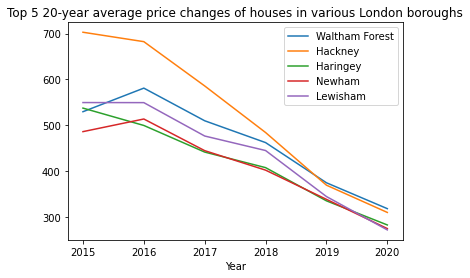

In [ ]:
properties_8.T.plot()
plt.title('Top 5 20-year average price changes of houses in various London boroughs')
plt.show()

### 4. Conclusion

In the chart above and the dataframe above, we can see that Waltham Forest is the London borough with the largerst change in average house price over the last 20 years. It's current average price is 318% higher than it was 20 years ago.

We can also note that there a recent downtrend in the 20-year percent change in prices during the last 5 years. Without further analysis, it is unclear if there was a recent downturn in price that was significant enough impact this long-term metric, or if a period of atypically low prices fell out of the rolling 20-year lookback period.